### Image Classifier Practice
Video tutorial: [Classify Images Using Python & Machine Learning](https://www.youtube.com/watch?v=mB7fdy67eFw)

In [ ]:
tree = ElementTree.parse(filename)

In [ ]:
root = tree.getroot()

In [ ]:
for box in root.findall('.//bndbox'):
	xmin = int(box.find('xmin').text)
	ymin = int(box.find('ymin').text)
	xmax = int(box.find('xmax').text)
	ymax = int(box.find('ymax').text)
	coors = [xmin, ymin, xmax, ymax]

In [ ]:

# extract image dimensions
width = int(root.find('.//size/width').text)
height = int(root.find('.//size/height').text)

In [ ]:
# function to extract bounding boxes from an annotation file
def extract_boxes(filename):
	# load and parse the file
	tree = ElementTree.parse(filename)
	# get the root of the document
	root = tree.getroot()
	# extract each bounding box
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	# extract image dimensions
	width = int(root.find('.//size/width').text)
	height = int(root.find('.//size/height').text)
	return boxes, width, height

In [38]:
# Load the data
from keras.datasets import cifar10

In [39]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
# Check the class types

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
# Check the datatypes

print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

uint8
uint8
uint8
int64


In [42]:
# Printing shape 

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape:(10000, 1)


>**`X_train`** shape: 50,000 rows with 32 by 32 pixel images with a depth = 3
- Depth is the visible wave lengths: red, green, blue (RGB)

In [44]:
# First image
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [45]:
# Show image as picture
import matplotlib.pyplot as plt

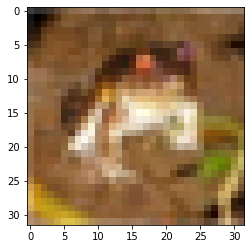

In [46]:
img = plt.imshow(X_train[0])

In [49]:
# print label of image (6 corresponds to frog)
print(f'The class is: {y_train[0]}')

The class is: [6]


In [51]:
# One-hot encoding: convert labels into set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [55]:
# Print labels
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [53]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
# One in position 6 (because it's class 6 - frog)
print(f'Image 1 class: {y_train_one_hot[0]}')

Image 1 class: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [64]:
# Normalize pixels in images to be values between 0 and 1
# Divide by 255 because there's 255 pixels and want it to be between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [66]:
# Build the CNN - Convolution Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the architecture
# Instantiate model
model = Sequential()

# Convolution layer
# Feature map
model.add(Conv2D(32,(5, 5), 
                 activation='relu', 
                 input_shape=(32, 32, 3))
         )

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution layer
# Feature map
model.add(Conv2D(32,(5, 5), 
                 activation='relu')
         )

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Add layer
model.add(Dense(1000, activation='relu'))
# Add layer - 10 for number of features
model.add(Dense(10, activation='softmax'))

In [67]:
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [68]:
# Fit model 
hist = model.fit(X_train, y_train_one_hot, 
                 batch_size=256, 
                 epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 25s 726us/step - loss: 2.1567 - accuracy: 0.2007 - val_loss: 2.0429 - val_accuracy: 0.2575
Epoch 2/10
35000/35000 [==============================] - 23s 665us/step - loss: 1.9955 - accuracy: 0.2766 - val_loss: 1.9562 - val_accuracy: 0.3069
Epoch 3/10
35000/35000 [==============================] - 22s 618us/step - loss: 1.8986 - accuracy: 0.3105 - val_loss: 1.8743 - val_accuracy: 0.3204
Epoch 4/10
35000/35000 [==============================] - 22s 641us/step - loss: 1.8204 - accuracy: 0.3409 - val_loss: 1.7967 - val_accuracy: 0.3581
Epoch 5/10
35000/35000 [==============================] - 22s 628us/step - loss: 1.7456 - accuracy: 0.3722 - val_loss: 1.7633 - val_accuracy: 0.3680
Epoch 6/10
35000/35000 [==============================] - 22s 625us/step - loss: 1.6821 - accuracy: 0.3940 - val_loss: 1.6620 - val_accuracy: 0.4032
Epoch 7/10
35000/35000 [==============================] 

In [70]:
model.evaluate(X_train, y_train_one_hot)[1]

50000/50000 [==============================] - 12s 241us/step


0.4583199918270111

In [69]:
# Get model's accuracy
model.evaluate(X_test, y_test_one_hot)[1]

10000/10000 [==============================] - 3s 279us/step


0.4625000059604645

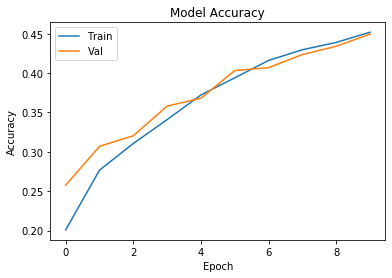

In [75]:
# Visualize accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Visualize accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

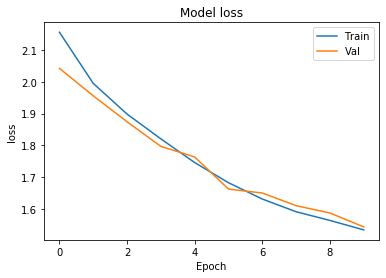

In [77]:
# Visualize model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [80]:
my_image = plt.imread('cat.jpg')

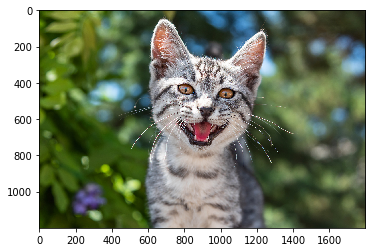

In [82]:
img = plt.imshow(my_image)

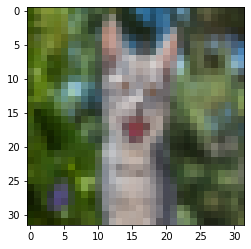

In [85]:
# Resize image to put into model
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)y

In [89]:
# Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

In [90]:
# Print the probabilities 
probabilities

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [92]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 
                   'deer', 'dog','frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

In [96]:
print(f'Most likely class: {number_to_class[index[9]]} \nProbability: {probabilities[0, index[9]]}')

Most likely class: dog 
Probability: 1.0


In [97]:
print(f'Second most likely class: {number_to_class[index[8]]} \nProbability: {probabilities[0, index[8]]}')
print(f'Third most likely class: {number_to_class[index[7]]} \nProbability: {probabilities[0, index[7]]}')
print(f'Fourth most likely class: {number_to_class[index[6]]} \nProbability: {probabilities[0, index[6]]}')


Second most likely class: truck 
Probability: 0.0
Third most likely class: ship 
Probability: 0.0
Fourth most likely class: horse 
Probability: 0.0


In [98]:
# Save model
model.save('my_model.h5')

In [100]:
# Load the model 
from keras.models import load_model
model = load_model('my_model.h5')